In [19]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv("./numerai_dataset_99/numerai_training_data.csv",header=0)
tour = pd.read_csv("./numerai_dataset_99/numerai_tournament_data.csv",header=0)

train.groupby(by='era').target.value_counts()

era     target
era1    0          824
        1          824
era10   0         1274
        1         1274
era100  0         1889
        1         1888
era101  0         1903
        1         1903
era102  0         1964
        1         1964
era103  0         1871
        1         1870
era104  0         1870
        1         1870
era105  0         1822
        1         1822
era106  0         1882
        1         1882
era107  0         1829
        1         1828
era108  0         1538
        1         1537
era109  0         1781
        1         1780
era11   0         1226
        1         1226
era110  0         1856
        1         1856
era111  0         1860
        1         1859
                  ... 
era86   0         1722
        1         1721
era87   0         1844
        1         1843
era88   0         1838
        1         1837
era89   0         1831
        1         1831
era9    0         1208
        1         1207
era90   0         1811
        1         1

In [20]:
train.era = train.era.factorize()[0]  # era is a number from 0 to 119

In [24]:
feature_cols = [f for f in train.columns if "feature" in f]
rf = RandomForestClassifier()
rf.fit(train[feature_cols],train.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# feature importances are almost similar to each other.

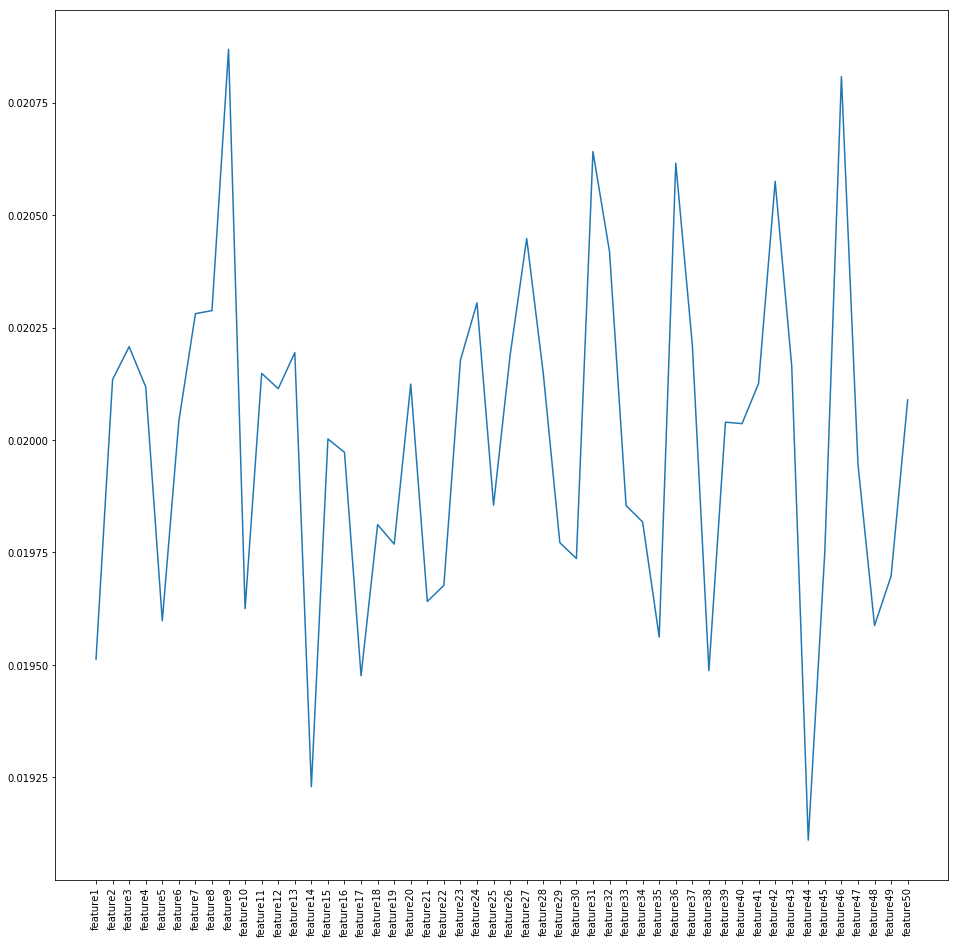

In [30]:
#feature importances oscillate around 0.02, there is no interesting feature at this point.
plt.figure(figsize=(16,16))
plt.plot(rf.feature_importances_)
plt.xticks(np.arange(train[feature_cols].shape[1]), train[feature_cols].columns.tolist(), rotation=90);

In [31]:
rf.feature_importances_

array([ 0.01951247,  0.02013432,  0.02020729,  0.02011786,  0.01959803,
        0.02004185,  0.02028084,  0.02028762,  0.02086833,  0.01962499,
        0.02014815,  0.02011397,  0.02019425,  0.01922885,  0.0200022 ,
        0.01997247,  0.01947564,  0.01981168,  0.01976843,  0.02012412,
        0.01964081,  0.01967659,  0.0201775 ,  0.02030478,  0.01985506,
        0.02018851,  0.02044791,  0.02014808,  0.01977167,  0.01973633,
        0.02064137,  0.02041876,  0.01985409,  0.01981749,  0.0195616 ,
        0.02061543,  0.02021151,  0.01948698,  0.02003956,  0.02003623,
        0.02012573,  0.02057517,  0.02016446,  0.01911009,  0.01975303,
        0.02080809,  0.01994609,  0.01958724,  0.01969736,  0.02008911])